In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 40)

# from vivarium_research_prl.noise import corruption, fake_names

!date
!whoami
!uname -a
!pwd

Wed 07 Dec 2022 03:01:23 PM PST
ndbs
Linux int-slurm-sarchive-p0009 5.4.0-88-generic #99-Ubuntu SMP Thu Sep 23 17:29:00 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux
/mnt/share/code/ndbs/vivarium_research_prl/linkage/wic_case_study


In [2]:
%load_ext autoreload
%autoreload 2

# Load census data and state table for year 2020

In [3]:
project_output_dir = '/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop'
output_subdir = 'results/special_last_names/florida/2022_10_14_10_49_32/population_table/'
output_dir = f'{project_output_dir}/{output_subdir}'

!ls -l $output_dir

total 32224
-rw-rw-r-- 1 albrja   IHME-Simulationscience 12622072 Oct 20 23:08 decennial_census.hdf
-rwxrwxrwx 1 beatrixh IHME-Simulationscience 20364830 Nov 14 16:42 state_table.hdf


In [4]:
decennial_census_path = f'{output_dir}/decennial_census.hdf'
with pd.HDFStore(decennial_census_path, 'r') as census_hdf:
    print(census_hdf.info())
    census_keys = census_hdf.keys()

<class 'pandas.io.pytables.HDFStore'>
File path: /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/special_last_names/florida/2022_10_14_10_49_32/population_table//decennial_census.hdf
/year_2020            frame        (shape->[47444,10])
/year_2030            frame        (shape->[46440,10])
/year_2040            frame        (shape->[44626,10])


In [5]:
state_table_path = f'{output_dir}/state_table.hdf'
with pd.HDFStore(state_table_path, 'r') as state_table_hdf:
    print(state_table_hdf.info())
    state_table_keys = state_table_hdf.keys()

<class 'pandas.io.pytables.HDFStore'>
File path: /mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop/results/special_last_names/florida/2022_10_14_10_49_32/population_table//state_table.hdf
/ymd_2020_4_1            frame        (shape->[50000,27])
/ymd_2040_5_1            frame        (shape->[57470,27])


In [6]:
census_df = pd.read_hdf(decennial_census_path, 'year_2020')
state_table_df = pd.read_hdf(state_table_path, 'ymd_2020_4_1')
print(f'{census_df.shape=}')
print(f'{state_table_df.shape=}')

census_df.shape=(47444, 10)
state_table_df.shape=(50000, 27)


In [7]:
census_df

,first_name,last_name,age,date_of_birth,address,zipcode,relation_to_household_head,sex,race_ethnicity,middle_initial
0,Margaret,Clark,68.681336,1951-07-27,"1344 winoka rd brooksville, fl",34601,Reference person,Female,Black,J
1,Jeffrey,Littlejohn,52.913882,1967-05-03,"927 23rd st clearwater, fl",34698,Reference person,Male,Black,V
2,Briana,Jackson,13.566889,2006-09-07,"927 23rd st clearwater, fl",34698,Biological child,Female,Black,A
3,Benjamin,Cox,21.444732,1998-10-21,"927 23rd st clearwater, fl",34698,Stepchild,Male,Black,D
4,Willie,Tucker,72.478355,1947-10-09,"8904 167th place fleming island, fl",32003,Reference person,Male,White,J
...,...,...,...,...,...,...,...,...,...,...
49993,Thomas,Gutierrez,29.374925,1990-11-16,"2210 henn hyde rd ne hollywood, fl",33021,Institutionalized GQ pop,Male,Latino,B
49994,Marcus,Roman,31.731657,1988-07-08,"2210 henn hyde rd ne hollywood, fl",33021,Institutionalized GQ pop,Male,Multiracial or Other,S
49997,Christian,Rosales,36.294295,1983-12-16,"701 haber rd vero beach, fl",32968,Institutionalized GQ pop,Male,Latino,C
49998,Phillip,Morton,34.806130,1985-06-11,"114 s frnt st fort myers, fl",33919,Institutionalized GQ pop,Male,White,J


In [8]:
state_table_df

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,years_of_life_lost,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address
0,True,Jenny,Female,Reference person,Black,Standard,NaT,Clark,12,486-24-8278,...,0.0,not_dead,34601,"1344 winoka rd brooksville, fl",-1,2019-03-04 18:00:00,46,not implemented,33187,"2408 brookshire dr sunset corners, fl"
1,True,Virgil,Male,Reference person,Black,Standard,NaT,Littlejohn,12,108-89-8623,...,0.0,not_dead,34698,"927 23rd st clearwater, fl",-1,NaT,193,not implemented,33948,"144 tulip ln prt charlotte, fl"
2,True,Annaliese,Female,Biological child,Black,Standard,NaT,Jackson,12,788-05-3097,...,0.0,not_dead,34698,"927 23rd st clearwater, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA
3,True,Devyn,Male,Stepchild,Black,Standard,NaT,Cox,12,,...,0.0,not_dead,34698,"927 23rd st clearwater, fl",-1,NaT,204,not implemented,33169,"1835 harvard dr hialeah, fl"
4,True,Jonathan,Male,Reference person,White,Standard,NaT,Tucker,12,009-31-4192,...,0.0,not_dead,32003,"8904 167th place fleming island, fl",-1,NaT,176,not implemented,34293,"2607 e bluefield ave venice, fl"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,Nicholas,Male,Institutionalized GQ pop,White,Other institutional,NaT,Roberts,12,625-97-5353,...,0.0,not_dead,33919,"114 s frnt st fort myers, fl",-1,NaT,-1,unemployed,NA,NA
49996,True,John,Male,Institutionalized GQ pop,White,Carceral,NaT,Campbell,12,238-09-2208,...,0.0,not_dead,33021,"2210 henn hyde rd ne hollywood, fl",-1,NaT,-1,unemployed,NA,NA
49997,True,Charles,Male,Institutionalized GQ pop,Latino,Nursing home,NaT,Rosales,12,650-80-3526,...,0.0,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA
49998,True,Jermaine,Male,Institutionalized GQ pop,White,Other institutional,NaT,Morton,12,784-92-1608,...,0.0,not_dead,33919,"114 s frnt st fort myers, fl",-1,NaT,19,not implemented,33444,"92 address unassigned delray beach, fl"


# Why are there more records in the state table than the census?

Oh, I bet these are the people systematically omitted from the census within the simulation according to the [documentation](https://vivarium-research.readthedocs.io/en/latest/concept_models/vivarium_census_synthdata/concept_model.html#census) (see the **Who to Sample** section).

Ok, if that's the case, then i should include these people in the pool of people eligible for WIC.

**Question 1:** Should we perhaps make these omitted kids or mothers *more* likely to appear in WIC data?

**Question 2:** Should we omit *additional* kids from the census beyond those who have already been omitted by our simulation's decennial census observer?

In [9]:
# Looks like all columns are the same, except middle_initial is not in the state table
merged_df = state_table_df.merge(census_df, how='outer')
merged_df

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address,middle_initial
0,True,Jenny,Female,Reference person,Black,Standard,NaT,Clark,12,486-24-8278,...,not_dead,34601,"1344 winoka rd brooksville, fl",-1,2019-03-04 18:00:00,46,not implemented,33187,"2408 brookshire dr sunset corners, fl",J
1,True,Virgil,Male,Reference person,Black,Standard,NaT,Littlejohn,12,108-89-8623,...,not_dead,34698,"927 23rd st clearwater, fl",-1,NaT,193,not implemented,33948,"144 tulip ln prt charlotte, fl",V
2,True,Annaliese,Female,Biological child,Black,Standard,NaT,Jackson,12,788-05-3097,...,not_dead,34698,"927 23rd st clearwater, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA,A
3,True,Devyn,Male,Stepchild,Black,Standard,NaT,Cox,12,,...,not_dead,34698,"927 23rd st clearwater, fl",-1,NaT,204,not implemented,33169,"1835 harvard dr hialeah, fl",D
4,True,Jonathan,Male,Reference person,White,Standard,NaT,Tucker,12,009-31-4192,...,not_dead,32003,"8904 167th place fleming island, fl",-1,NaT,176,not implemented,34293,"2607 e bluefield ave venice, fl",J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,Nicholas,Male,Institutionalized GQ pop,White,Other institutional,NaT,Roberts,12,625-97-5353,...,not_dead,33919,"114 s frnt st fort myers, fl",-1,NaT,-1,unemployed,NA,NA,NaN
49996,True,John,Male,Institutionalized GQ pop,White,Carceral,NaT,Campbell,12,238-09-2208,...,not_dead,33021,"2210 henn hyde rd ne hollywood, fl",-1,NaT,-1,unemployed,NA,NA,NaN
49997,True,Charles,Male,Institutionalized GQ pop,Latino,Nursing home,NaT,Rosales,12,650-80-3526,...,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA,C
49998,True,Jermaine,Male,Institutionalized GQ pop,White,Other institutional,NaT,Morton,12,784-92-1608,...,not_dead,33919,"114 s frnt st fort myers, fl",-1,NaT,19,not implemented,33444,"92 address unassigned delray beach, fl",J


In [10]:
# Rows missing middle initial should be the ones missing from the census
omitted_df = merged_df.query("middle_initial.isna()")
omitted_df

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address,middle_initial
41,True,Gayle,Female,Opp-sex spouse,White,Standard,NaT,Shonka Miller,12,836-72-8178,...,not_dead,33444,"92 address unassigned delray beach, fl",-1,2019-03-04 18:00:00,19,not implemented,33444,"92 address unassigned delray beach, fl",NaN
60,True,Frankie,Male,Reference person,White,Standard,NaT,Paterson-Withey,12,242-12-7210,...,not_dead,32459,"18659 fairport sta rosa beach, fl",-1,NaT,148,not implemented,33412,"9 north shore dr unincorporated, fl",NaN
98,True,Fletcher,Male,Biological child,White,Standard,NaT,Peterson,12,184-42-0340,...,not_dead,32763,"5266 shady rd orange city, fl",-1,NaT,-1,unemployed,NA,NA,NaN
130,True,Laverne,Female,Reference person,White,Standard,NaT,Ristau,12,,...,not_dead,32819,"10012 se 247th pl unincorporated, fl",-1,2019-03-04 18:00:00,127,not implemented,33134,"1022 wood st miami, fl",NaN
154,True,Rickey,Male,Reference person,White,Standard,NaT,Lynch,12,695-41-3579,...,not_dead,33993,"3 fairview av extension cape coral, fl",-1,NaT,56,not implemented,34957,"350 maple ter jensen beach, fl",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,True,Edythe,Female,Institutionalized GQ pop,White,Carceral,NaT,Patel,12,428-53-4710,...,not_dead,33021,"2210 henn hyde rd ne hollywood, fl",-1,2019-03-04 18:00:00,67,not implemented,32819,"10012 se 247th pl unincorporated, fl",NaN
49988,True,Brian,Male,Institutionalized GQ pop,White,Nursing home,NaT,Duboise,12,830-16-4048,...,not_dead,32968,"701 haber rd vero beach, fl",-1,NaT,-1,unemployed,NA,NA,NaN
49990,True,Ian,Male,Institutionalized GQ pop,Black,Carceral,NaT,Scott,12,567-11-4251,...,not_dead,33021,"2210 henn hyde rd ne hollywood, fl",-1,NaT,-1,unemployed,NA,NA,NaN
49995,True,Nicholas,Male,Institutionalized GQ pop,White,Other institutional,NaT,Roberts,12,625-97-5353,...,not_dead,33919,"114 s frnt st fort myers, fl",-1,NaT,-1,unemployed,NA,NA,NaN


In [11]:
merged_df.columns

Index(['tracked', 'middle_name', 'sex', 'relation_to_household_head',
       'race_ethnicity', 'housing_type', 'exit_time', 'last_name', 'state',
       'ssn', 'date_of_birth', 'first_name', 'entrance_time', 'age',
       'household_id', 'alive', 'puma', 'years_of_life_lost', 'cause_of_death',
       'zipcode', 'address', 'parent_id', 'last_birth_time', 'employer_id',
       'employer_name', 'employer_zipcode', 'employer_address',
       'middle_initial'],
      dtype='object')

# Look at distribution of ages

In [12]:
omitted_df.age.describe()

count    2556.000000
mean       42.656335
std        23.998590
min         0.078780
25%        22.285451
50%        43.122646
75%        62.197455
max        95.945056
Name: age, dtype: float64

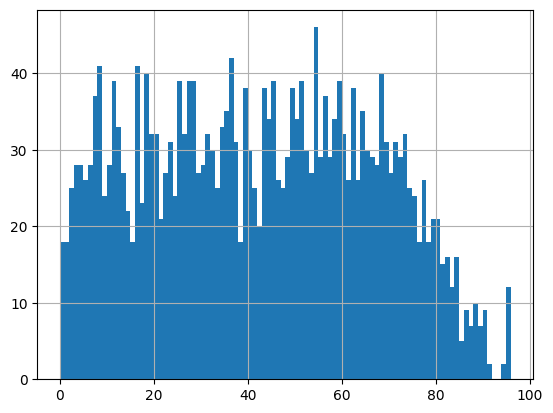

In [13]:
omitted_df.age.hist(bins=96);

# See how many kids under 5 were omitted already

Only 116 out of 2470 total kids under 5. 

In [14]:
omitted_df.query("age <=5")

,tracked,middle_name,sex,relation_to_household_head,race_ethnicity,housing_type,exit_time,last_name,state,ssn,...,cause_of_death,zipcode,address,parent_id,last_birth_time,employer_id,employer_name,employer_zipcode,employer_address,middle_initial
98,True,Fletcher,Male,Biological child,White,Standard,NaT,Peterson,12,184-42-0340,...,not_dead,32763,"5266 shady rd orange city, fl",-1,NaT,-1,unemployed,NA,NA,NaN
444,True,Juliana,Female,Biological child,Latino,Standard,NaT,Cedillo,12,864-26-0317,...,not_dead,34734,"78 fox stre unincorporated, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA,NaN
882,True,Cooper,Male,Biological child,Black,Standard,NaT,Williams,12,391-29-9992,...,not_dead,32960,"20 central street vero beach, fl",-1,NaT,-1,unemployed,NA,NA,NaN
990,True,Mia,Female,Biological child,Latino,Standard,NaT,Aldana,12,750-85-1993,...,not_dead,33957,"333 riverside dr sanibel, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA,NaN
1114,True,Harper,Female,Biological child,White,Standard,NaT,Waiters,12,731-76-7632,...,not_dead,33179,"9082 weddel pine island ridge, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47103,True,Gavin,Male,Biological child,White,Standard,NaT,Mattocks,12,298-64-1245,...,not_dead,33179,"5015 creekstone dr se hialeah, fl",-1,NaT,-1,unemployed,NA,NA,NaN
47171,True,Lincoln,Male,Biological child,Multiracial or Other,Standard,NaT,Ogston,12,532-16-7028,...,not_dead,33811,"11205 woodley avnue south unit no a lakeland, fl",-1,NaT,-1,unemployed,NA,NA,NaN
47373,True,Elisha,Male,Biological child,White,Standard,NaT,Loye,12,,...,not_dead,33064,"1798 nw 34th st deerfield beach, fl",-1,NaT,-1,unemployed,NA,NA,NaN
47953,True,Brooke,Female,Biological child,White,Standard,NaT,Smith,12,551-78-0220,...,not_dead,33175,"105 bette rd kendall, fl",-1,2019-03-04 18:00:00,-1,unemployed,NA,NA,NaN


In [15]:
# Omitted kids < 5 comprise about 0.23% of the total population
116/50000

0.00232

In [16]:
# Number of total kids under 5
(state_table_df.age < 5).sum()

2470

In [17]:
# About 4.7% of kids < 5 were omitted from the census
(omitted_df.age < 5).sum() / (state_table_df.age < 5).sum()

0.04696356275303644

In [18]:
# About 5.1% of people overall were omitted from the censuss
len(omitted_df) / len(state_table_df)

0.05112

In [19]:
# About 4.94% of the total population is under 5
(state_table_df.age < 5).sum() / len(state_table_df)

0.0494

In [20]:
.0494*.047

0.0023218

# Write a function to get census data for linking

Following advice for random seed generation from user guide for `scipy.stats`:

https://docs.scipy.org/doc/scipy/tutorial/stats.html#random-number-generation

Also see Numpy `SeedSequence` documentation:

https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.SeedSequence.html

## See these references to figure out realistic values for fraction of missing kids in census:

* https://countallkids.org/
* https://folio.iupui.edu/bitstream/handle/10244/836/final%20census%20undercount%20paper.pdf

In [21]:
# Generate random seed using a seed sequence
# Original entropy saved below as seed is 207018831476914653455980552257455521389
np.random.SeedSequence()

SeedSequence(
    entropy=137551946490885461391711242483460165855,
)

In [22]:
# Copy and paste original seed entropy to get reproducible results
# (By copying and pasting once, this seed won't change when notebook is rerun
# unless manually edited by user)
seed = 207018831476914653455980552257455521389
rng = np.random.default_rng(seed)

In [23]:
sq = np.random.SeedSequence(seed)
print(sq.entropy)
print(sq.generate_state(1))
sq.generate_state(1) # Check whether value changes on additional calls... no, it doesn't

207018831476914653455980552257455521389
[3071753407]


array([3071753407], dtype=uint32)

In [24]:
# Apparently pandas uses Numpy RandomState by default instead of
# np.random.Generator, and Numpy RandomState apparently needs
# a seed in the range 0 to 2**32-1
census_df.sample(frac=0.3, random_state=sq.generate_state(1))

,first_name,last_name,age,date_of_birth,address,zipcode,relation_to_household_head,sex,race_ethnicity,middle_initial
6482,Jack,Rodriguez,11.596722,2008-08-26,"5275 white rd jacksonville, fl",32210,Biological child,Male,Latino,S
7304,Gonzalo,Bhatt,30.645594,1989-08-09,"840 n 24th st largo, fl",33777,Roommate,Male,NHOPI,K
36785,Jasmine,Williams,16.794577,2003-06-16,"21400 golden triangle rd kissimmee, fl",34747,Stepchild,Female,Black,M
47298,Kelly,Boros,29.376063,1990-11-15,"2540 monterey gainesville, fl",32606,Biological child,Female,White,M
13470,Brittany,Wayne,35.509609,1984-09-27,"101 cntrl ave s clearwater, fl",33763,Opp-sex spouse,Female,White,C
...,...,...,...,...,...,...,...,...,...,...
45211,Shannon,Carpenter,47.529725,1972-09-20,"1896 scarlotti court holiday, fl",34691,Reference person,Male,White,D
16567,Ellis,Martin,17.883179,2002-05-14,"7794 sw 102nd ln st. petersburg, fl",33703,Biological child,Male,White,J
21573,Mary,Zimmerman,68.533049,1951-09-19,"9625 innerwick pl lake wales, fl",33859,Reference person,Female,White,C
44653,Pamela,Green,55.060347,1965-03-10,"156 kemper street spring hill, fl",34606,Reference person,Female,Black,D


In [25]:
# Fraction of total missing kids by omitting an addition fraction `frac`
orig_frac = 0.04696356275303644
frac=0.02
1-(1-orig_frac)*(1-frac)

0.06602429149797573

In [26]:
def omit_kids_from_census(census_df, frac=0.02, random_state=None):
    """Generate decennial census data to link by dropping additional kids.
    
    Note:
    `frac` is the fraction of *additional* kids to drop, beyond kids that
    have already been omitted from census_df (e.g., kids that were already
    omitted within the simulation if `census_df` is the file output by the
    decennial census observer.)
    
    For example, in the file output on 10/14/22, there were
    already about 4.7% of kids missing, so the default `frac` of .02
    will drop an additional 2% of the remaining kids, for a total of
    1-(1-.047)*(1-0.02) = 6.6% of kids omitted.
    """
    rng = np.random.default_rng(random_state) # Always use Generator instead of RandomState
    under_five_df = census_df.loc[census_df['age'] < 5]
    rows_to_drop = under_five_df.sample(frac=frac, random_state=rng)
    altered_census_df = census_df.drop(rows_to_drop.index)
    return altered_census_df

omit_kids_from_census(census_df, frac=0.05, random_state=seed)

,first_name,last_name,age,date_of_birth,address,zipcode,relation_to_household_head,sex,race_ethnicity,middle_initial
0,Margaret,Clark,68.681336,1951-07-27,"1344 winoka rd brooksville, fl",34601,Reference person,Female,Black,J
1,Jeffrey,Littlejohn,52.913882,1967-05-03,"927 23rd st clearwater, fl",34698,Reference person,Male,Black,V
2,Briana,Jackson,13.566889,2006-09-07,"927 23rd st clearwater, fl",34698,Biological child,Female,Black,A
3,Benjamin,Cox,21.444732,1998-10-21,"927 23rd st clearwater, fl",34698,Stepchild,Male,Black,D
4,Willie,Tucker,72.478355,1947-10-09,"8904 167th place fleming island, fl",32003,Reference person,Male,White,J
...,...,...,...,...,...,...,...,...,...,...
49993,Thomas,Gutierrez,29.374925,1990-11-16,"2210 henn hyde rd ne hollywood, fl",33021,Institutionalized GQ pop,Male,Latino,B
49994,Marcus,Roman,31.731657,1988-07-08,"2210 henn hyde rd ne hollywood, fl",33021,Institutionalized GQ pop,Male,Multiracial or Other,S
49997,Christian,Rosales,36.294295,1983-12-16,"701 haber rd vero beach, fl",32968,Institutionalized GQ pop,Male,Latino,C
49998,Phillip,Morton,34.806130,1985-06-11,"114 s frnt st fort myers, fl",33919,Institutionalized GQ pop,Male,White,J


# Count people in each age group

In the [current simulation run](https://github.com/ihmeuw/vivarium_census_prl_synth_pop/blob/693ee8ba3494f293a828b37b271dcbe169e79ff8/src/vivarium_census_prl_synth_pop/constants/data_values.py#L91), the census observer takes a simple random sample of 95% of people regardless of age. Eventually, [age dependence will be added](https://vivarium-research.readthedocs.io/en/latest/models/concept_models/vivarium_census_synthdata/concept_model.html#id46).

See [slack thread](https://ihme.slack.com/archives/C02KUQ9LX32/p1670442534802129) for comments from Zeb and Syl.

In [27]:
def get_age_counts(age_column):
    return np.floor(age_column).sort_values().value_counts(sort=False)

state_table_age_counts = get_age_counts(state_table_df.age)
census_age_counts = get_age_counts(census_df.age)

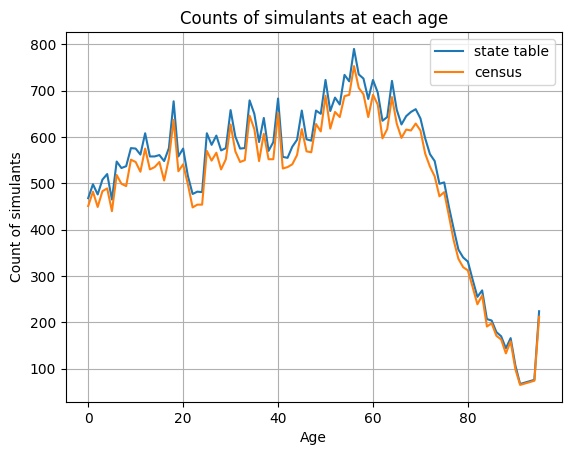

In [28]:
plt.plot(state_table_age_counts.index, state_table_age_counts, label='state table')
plt.plot(census_age_counts.index, census_age_counts, label='census')
plt.xlabel('Age')
plt.ylabel('Count of simulants')
plt.title("Counts of simulants at each age")
plt.grid()
plt.legend();